# MYOPIA STUDY
---

![title](Pictures/myopia-edited.webp)

---

## DATA SET DESCRIPTION
---
The data `myopia.csv` comes from a group of children who took part in the Orinda Longitudinal Study of Myopia (OLSM).  

The dataset includes 618 subjects who had at least five years of follow-up and were not myopic at the beginning. It contains data from their first exam and includes 17 variables.  
The table below describe all the variables contained in the data set:  

### List of attributes

- **ID**: unique subject identifier (from 1 to 618).
- **STUDYYEAR**: year in which the subject entered the study.
- **MYOPIC**: binary target variable indicating whether the subject developed myopia (1 = yes, 0 = no).
- **AGE**: age of the subject at the first visit (in years).
- **GENDER**: gender of the subject (0 = male, 1 = female).
- **SPHEQ**: spherical equivalent refraction (in diopters) – a measure of the eye's focusing power.
- **AL**: axial length (in mm) – length of the eye from front to back.
- **ACD**: anterior chamber depth (in mm) – distance from cornea to iris.
- **LT**: lens thickness (in mm) – thickness of the crystalline lens.
- **VCD**: vitreous chamber depth (in mm) – distance from lens to retina.
- **SPORTHR**: number of hours per week spent in sports or outdoor activities.
- **READHR**: number of hours per week spent reading for pleasure.
- **COMPHR**: number of hours per week spent on computer games or working on a computer.
- **STUDYHR**: number of hours per week spent studying for school.
- **TVHR**: number of hours per week spent watching television.
- **DIOPTERHR**: composite index of near-work activities calculated as:  
       `DIOPTERHR = 3 × (READHR + STUDYHR) + 2 × COMPHR + TVHR`
- **MOMMY**: binary indicator if the subject’s mother is myopic (1 = yes, 0 = no).
- **DADMY**: binary indicator if the subject’s father is myopic (1 = yes, 0 = no).
  
---

In [3]:
# Import all modules needed
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import colormaps # colormap

from scipy.stats import norm, chi2, expon, t, f  #  distribution
import scipy.stats as stats # predefined test routines

from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm


In [4]:
myopia = pd.read_csv('myopia.csv', sep=';')
myopia.head(10)

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1995,0,6,0,1.744,22.14,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,7,1993,0,6,1,0.683,22.33,3.186,3.654,15.49,12,7,2,1,8,36,0,1
7,8,1991,0,6,1,1.272,22.39,3.732,3.584,15.08,12,0,0,0,8,8,0,0
8,9,1991,0,7,0,1.396,22.62,3.464,3.408,15.74,4,0,3,1,3,12,0,0
9,10,1991,0,6,1,0.972,22.74,3.504,3.696,15.54,30,5,1,0,10,27,0,0


## DATASET STATISTICS
---

In [6]:
myopia.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,618.0,309.500000,178.545512,1.000,155.25000,309.500,463.750,618.000
STUDYYEAR,618.0,1992.359223,1.734507,1990.000,1991.00000,1992.000,1994.000,1995.000
MYOPIC,618.0,0.131068,0.337748,0.000,0.00000,0.000,0.000,1.000
AGE,618.0,6.299353,0.712950,5.000,6.00000,6.000,6.000,9.000
GENDER,618.0,0.488673,0.500277,0.000,0.00000,0.000,1.000,1.000
SPHEQ,618.0,0.801010,0.625918,-0.699,0.45625,0.729,1.034,4.372
AL,618.0,22.496780,0.680141,19.900,22.04000,22.465,22.970,24.560
ACD,618.0,3.578629,0.230394,2.772,3.42400,3.585,3.730,4.250
LT,618.0,3.541453,0.154519,2.960,3.43600,3.542,3.640,4.112
VCD,618.0,15.376780,0.664183,13.380,14.93000,15.360,15.840,17.300


## DATA VISUALIZATION

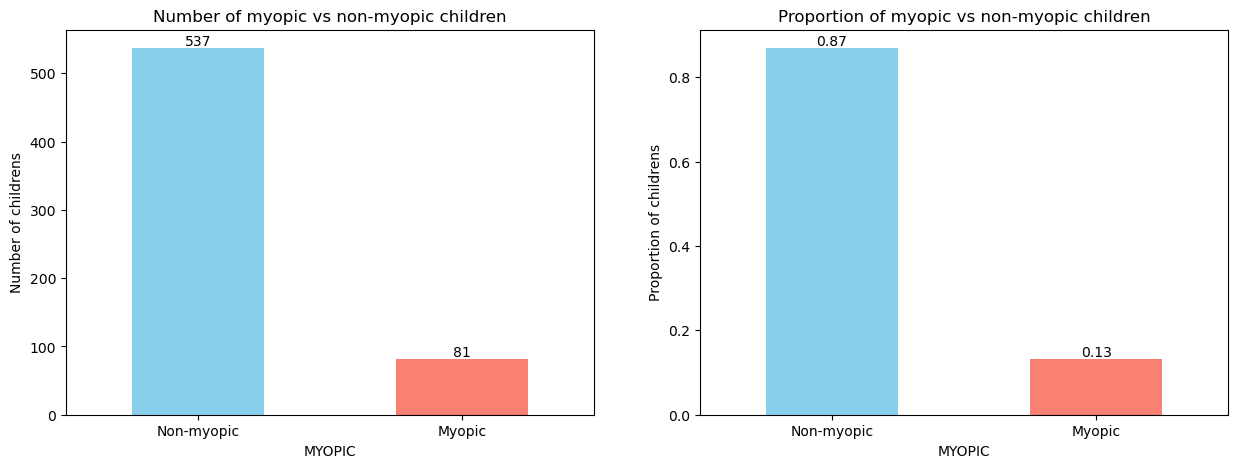

In [8]:
fig, (ax1, ax2)= plt.subplots( 1,2, figsize = (15, 5))

# Count and plot
counts_proportion = myopia['MYOPIC'].value_counts(normalize=True) 
counts_value =  myopia['MYOPIC'].value_counts()

ax1 = counts_value.plot(kind='bar', color=['skyblue', 'salmon'], ax= ax1)
ax2= counts_proportion.plot(kind='bar', color=['skyblue', 'salmon'], ax=ax2)

# First graph: number 
ax1.set_title('Number of myopic vs non-myopic children')
ax1.set_xticks(ticks=[0, 1], labels=['Non-myopic', 'Myopic'], rotation=0)
ax1.set_ylabel('Number of childrens')

# Labels on the bars
for i, v in enumerate(counts_value):
    ax1.text(i, v, f'{v}', ha='center', va='bottom')

# Second graph: proportion 
ax2.set_title('Proportion of myopic vs non-myopic children')
ax2.set_xticks(ticks=[0, 1], labels=['Non-myopic', 'Myopic'], rotation=0)
ax2.set_ylabel('Proportion of childrens')

# Labels on the bars
for i, v in enumerate(counts_proportion):
    ax2.text(i, v, f'{v:.2f}', ha='center', va='bottom')


---
Out of 618 children, only 81 (13%) developed myopia during the study period, while the remaining 537 (87%) did not.

This strong class imbalance indicates that myopia was relatively uncommon in the studied cohort.  

---

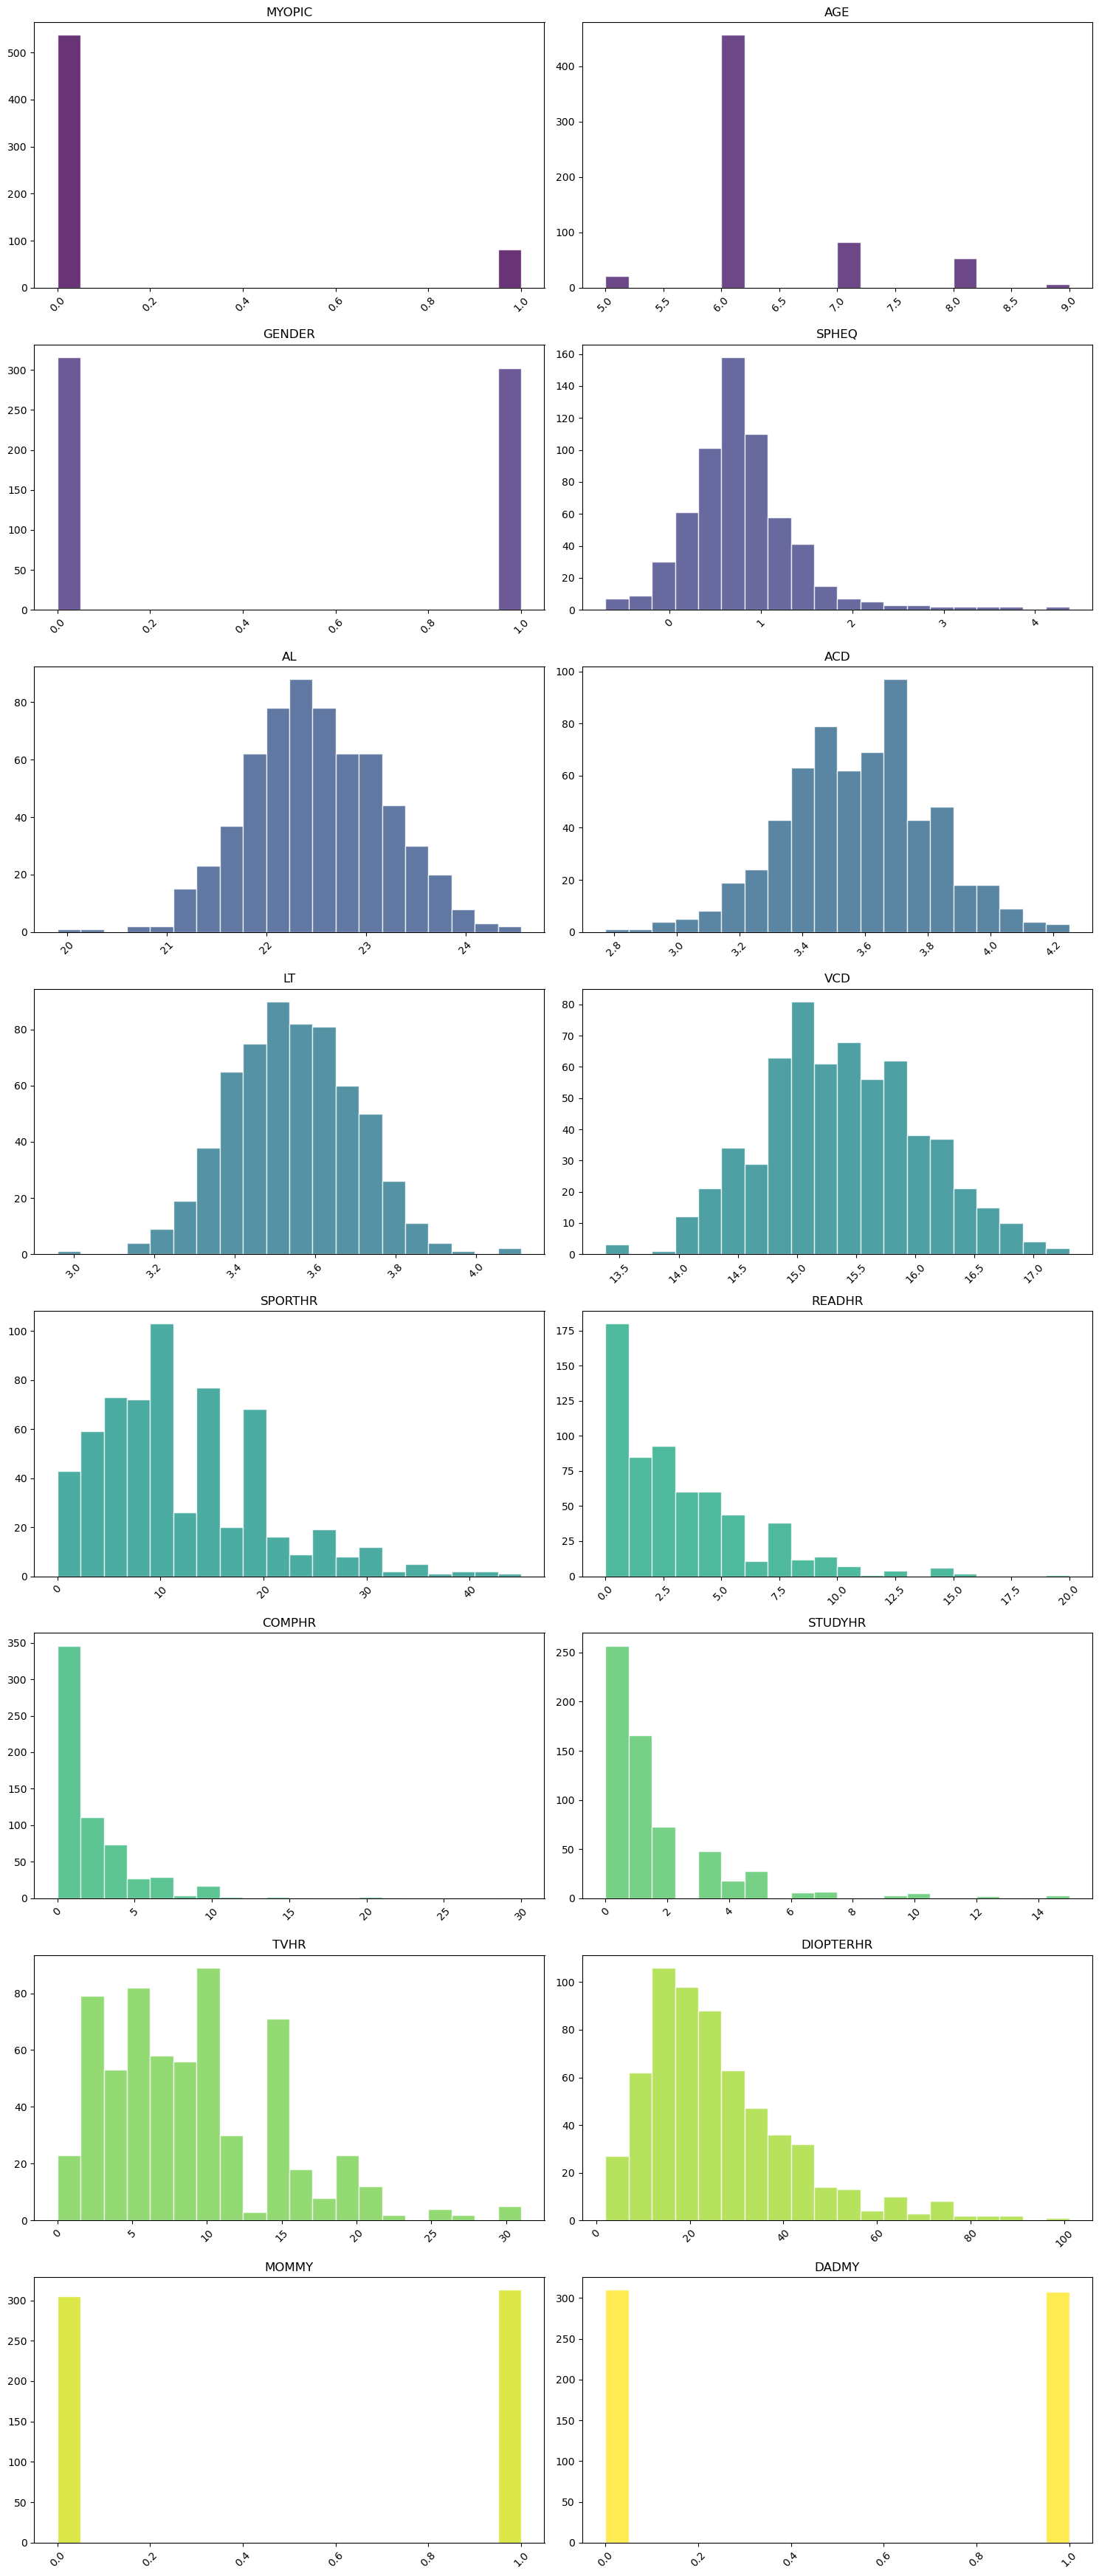

In [10]:
num_list = list(myopia.columns[2:])

fig = plt.figure(figsize=(15,35))

# Colormap
color = colormaps['viridis'].resampled(len(num_list))  # 'plasma', 'cool', 'rainbow'
color_list = color(np.linspace(0, 1, len(num_list)))

for i in range(len(num_list)):
    plt.subplot(8,2,i+1)
    plt.title(num_list[i])
    plt.xticks(rotation=45)
    plt.hist(myopia[num_list[i]], bins = 20 ,color=color_list[i],edgecolor='white',alpha=0.8)

plt.tight_layout()


---


### Boxplot: Visual activities among Myopic by myopia status

---

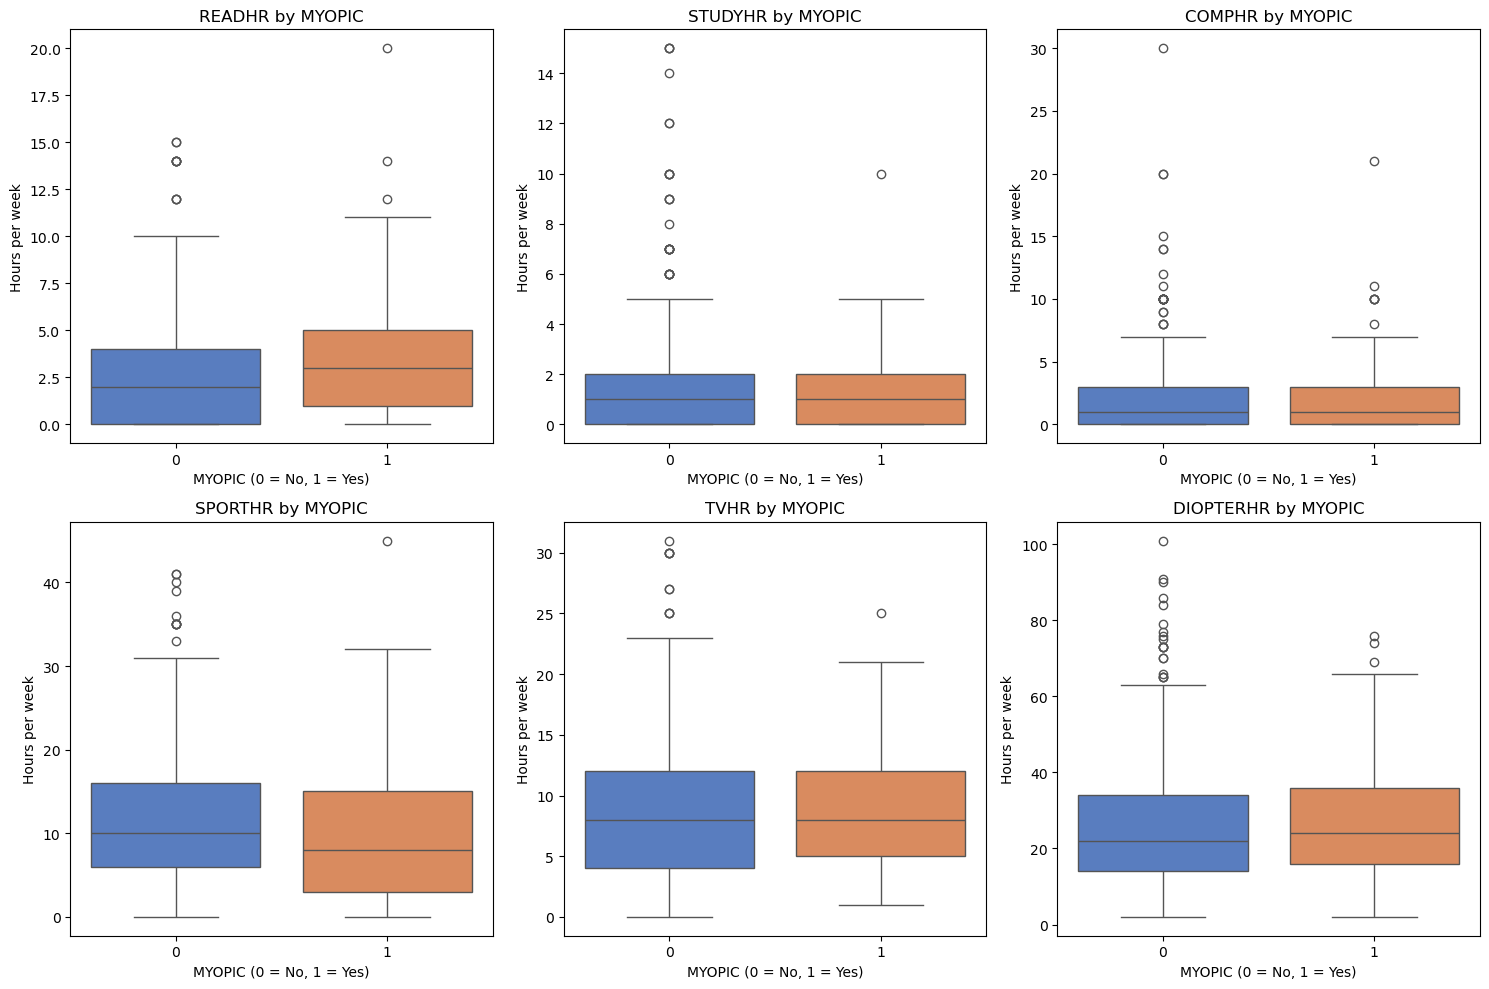

In [13]:
activity_vars = ['READHR', 'STUDYHR', 'COMPHR', 'SPORTHR', 'TVHR', 'DIOPTERHR']

plt.figure(figsize=(15, 10))
for i, col in enumerate(activity_vars):
    plt.subplot(2, 3, i + 1)
    #sns.boxplot(x='MYOPIC', y=col, hue='GENDER', data=myopia, palette='pastel')

    sns.boxplot(x='MYOPIC', y=col, data=myopia, hue = 'MYOPIC', palette= 'muted', legend = False)
    plt.title(f'{col} by MYOPIC')
    plt.xlabel('MYOPIC (0 = No, 1 = Yes)')
    plt.ylabel('Hours per week')

plt.tight_layout()
plt.show()



### Correlation Matrix

---

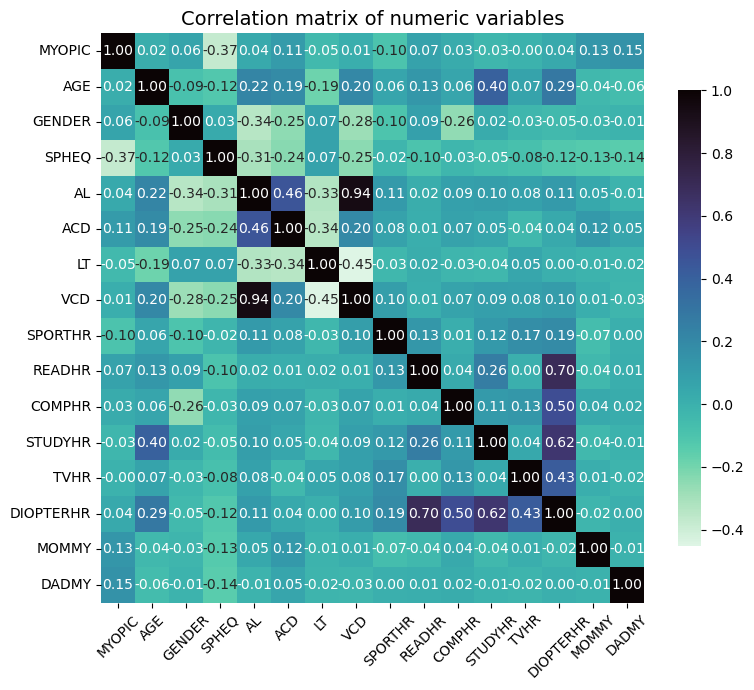

In [15]:
# Removing non-relevant features
myopia_red = myopia.drop(['ID', 'STUDYYEAR'], axis=1)

# Build the correlation matrix
corr_matrix = myopia_red.corr()

# Heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="mako_r", cbar_kws={"shrink": 0.8})
plt.title("Correlation matrix of numeric variables", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- **SPHEQ and MYOPIC** show a moderate negative correlation (-0.37), reflecting the definition of myopia based on refractive error.
- **Axial Length (AL)** is strongly positively correlated with **Vitreous Chamber Depth (VCD)** (0.94), as both relate to eye length. AL also shows negative correlation with **Lens Thickness (LT)**, suggesting thinner lenses in longer eyes.
- **Near-work components** such as `READHR`, `STUDYHR`, and `COMPHR` are positively correlated with each other and with `DIOPTERHR`, which is a weighted combination of these variables.
- **MYOPIC and SPORTHR** have a weak negative correlation (-0.10), in line with the hypothesis that more outdoor time may help prevent myopia.

No strong correlations are observed between MYOPIC and any single behavioral variable, supporting the need for further testing to determine significance.

---


### Scatter plot: ocular variables
---

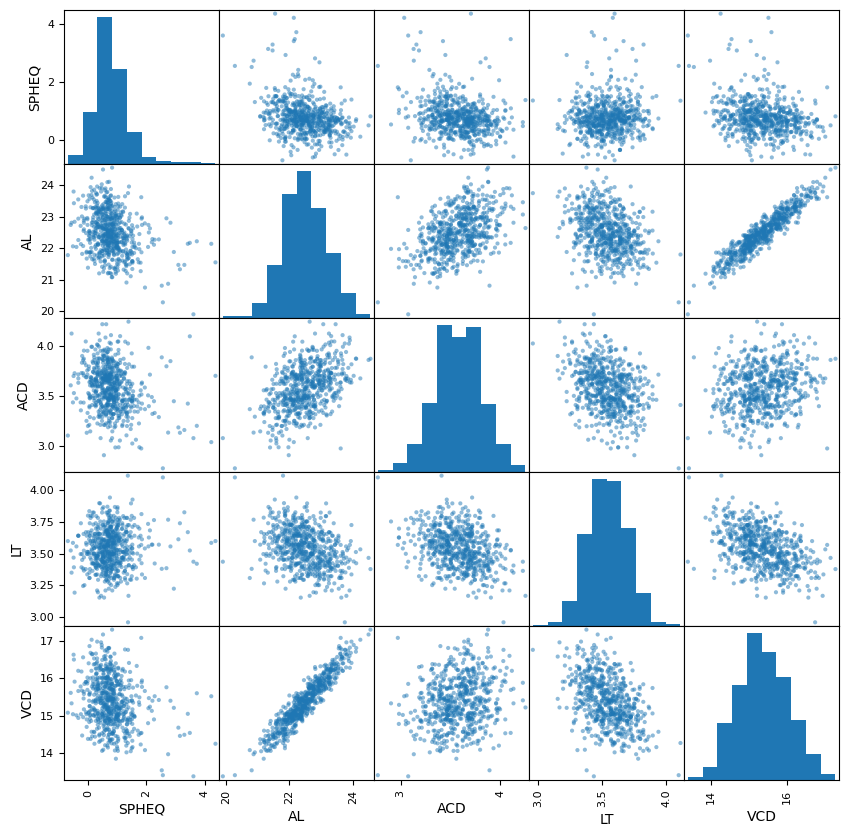

In [18]:
myopia_ocular = myopia.drop(['ID', 'STUDYYEAR', 'MYOPIC', 'GENDER', 'MOMMY', 'DADMY', 'AGE', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR'], axis=1)
# myopia_ocular = myopia.drop(['ID', 'AGE',  'STUDYYEAR', 'MYOPIC', 'GENDER', 'MOMMY', 'DADMY' ], axis=1)

pd.plotting.scatter_matrix(myopia_ocular, figsize = (10, 10));

---

As we could wxpect, the scatter matrix show a very strong linear relationship between `AL` (Axial Length) and `VCD` (Vitreous Chamber Depth), since both represent the lengths of the eye.  

A moderate negative trend can be observed between `SPHEQ` and `AL`, consistent with clinical knowledge that longer eyes are more likely to be myopic. Other pairs show almost no visible relationships.

---

### Distribution of SPHEQ (Spherical Equivalent Refraction)

----

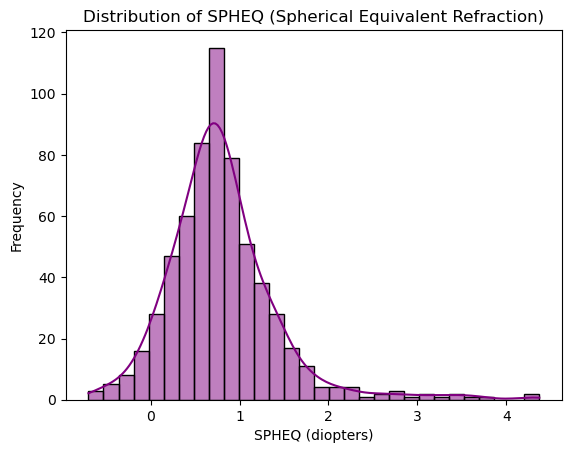

In [21]:
sns.histplot(data=myopia, x='SPHEQ', bins=30, kde=True, color='purple')
plt.title('Distribution of SPHEQ (Spherical Equivalent Refraction)')
plt.xlabel('SPHEQ (diopters)')
plt.ylabel('Frequency')
plt.show()

The histogram above shows the distribution of SPHEQ values in the dataset, representing the refractive status of each child's eye. Most children have positive SPHEQ values, indicating normal or hyperopia vision. Only a smaller portion of the sample exhibits negative SPHEQ values.   

This visualization highlights that myopia (defined as SPHEQ ≤ –0.75) is relatively uncommon in the sample.

---

## HYPOTESIS TESTING

---

### Research Questions:

1. **Do myopic children spend more than 3 hours per week reading for pleasure?**  
   *(*1-sample t-test*)*

2. **Is the presence of myopia independent of the child's gender?**  
   *(*Chi-squared test of independence*)*

3. **Is the time spent by myopic children on activities such as reading, studying, using the computer or playing sports equal to that of non-myopic children?**  
   *(*2-sample independent t-test*)*

4. **Is there a difference in the proportion of myopic children between those with myopic parents and those without?**  
   *(*2-sample z-test for proportions*)*

5. **Is there a correlation between the refraction error and time spent on near visual activities?**  
   Are `SPHEQ` and `DIOPTERHR` correlated?  
   *(*Pearson's correlation test*)*

6. **Is there a correlation between the refraction error and time spent in sports?**  
   Are `SPHEQ` and `SPORTHR` correlated?  
   *(*Pearson's correlation test*)*


----


### 1- Do myopic children spend more than 3 hours per week reading for pleasure? (1-sample t-test)
---

In [26]:
# State H0: mean <= 3
# State H1: mean > 3
mean = 3

# Set level of significance:
# Fix alpha
alpha = 0.05

# Compute TS
target = 'READHR'
n = len(myopia[target])
x_bar = myopia[target].mean()
S = myopia[target].std(ddof=1)
ts = (x_bar - mean) / (S/np.sqrt(n))

# Compute p-value
pvalue = 1 - t.cdf(ts, df=n-1)
print(f'p-value = {pvalue:.4f}')

# Make the decision
if pvalue < alpha:
    print(f'Reject H_0 at a level of significance {alpha:.2f}')
else:
    print(f'Fail to reject H_0 at a level of significance {alpha:.2f}')

p-value = 0.9505
Fail to reject H_0 at a level of significance 0.05


#### Answer 1
There is no statistically significant evidence that myopic children spend more than 3 hours per week reading for pleasure.

---

### 2- Is the presence of myopia independent of the child's gender?
---

MYOPIC  GENDER
0       0         281
        1         256
1       1          46
        0          35
Name: count, dtype: int64


<Axes: xlabel='MYOPIC'>

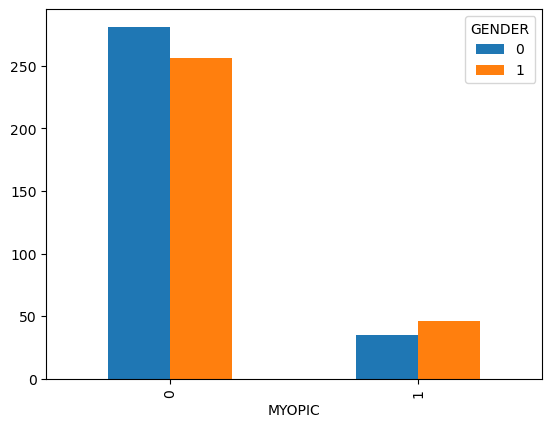

In [29]:
# Multi-index data frame!
# GENDER->(0 = male, 1 = female)
df_tmp = myopia.value_counts(subset=['MYOPIC','GENDER'])

print(df_tmp)

# Bar chart with myopic subjects, grouped by gender.
df_tmp.unstack().plot(kind='bar', stacked=False)


In [30]:
# Build contingency table
ctable = pd.crosstab(myopia['MYOPIC'], myopia['GENDER'])

print(ctable)

GENDER    0    1
MYOPIC          
0       281  256
1        35   46


In [31]:
# Are MYOPIC and GENDER independent?

# H0: x,y independent  
# H1: x,y dependent

# Level of significance alpha
alpha = 0.05

# chi-squared test of independence
res = stats.chi2_contingency(ctable)

#print(res)

# Print results
print(f' TS value   chi = {res.statistic:6.3f}')
print(f'        p-value = {res.pvalue:7.4f}')
print(f'sig. lev. alpha = {alpha:6.3f}')

# Reject or not H0
if res.pvalue < alpha:
    print("\nReject H0 --> Statistically significant association at a level of significance 0.05")
else:
    print("\nFail to reject H0 --> No statistically significant association at a level of significance 0.05")


 TS value   chi =  1.991
        p-value =  0.1582
sig. lev. alpha =  0.050

Fail to reject H0 --> No statistically significant association at a level of significance 0.05


#### Answer 2

From data we don't have enough evidence to conclude that MYOPIC and GENDER are dependent. Myopia appears to be independent of gender.

---

### 3- Is the time spent by myopic children on activities such as reading, studying, using the computer or playing sports equal to that of non-myopic children? (2-sample independent t-test) 

---

In [34]:
# Null hypothesis H0:  mean of myopic = mean of non-myopic  

# Level of significance
alpha = 0.05

# List of the variable to test
variables = ['READHR', 'STUDYHR', 'COMPHR', 'SPORTHR', 'TVHR', 'DIOPTERHR']

# Initialize 
results = []

for var in variables:
    # Extract the two groups
    group0 = myopia[myopia['MYOPIC'] == 0][var]
    group1 = myopia[myopia['MYOPIC'] == 1][var]

    # Tetst Statistic
    t_stat, p_val = stats.ttest_ind(group0, group1, equal_var=False)

    if p_val < alpha:
        H0 = 'Reject'
    else:
        H0 = 'Fail to reject'

    results.append({
        'Variable': var,
        'Mean (MYOPIC=0)': round(group0.mean(), 2),
        'Mean (MYOPIC=1)': round(group1.mean(), 2),
        'T-statistic': round(t_stat, 3),
        'P-value': round(p_val, 4),
        'Result': H0
    })

# Show the resoults in DataFrame
t_test_results = pd.DataFrame(results)
display(t_test_results)

,Variable,Mean (MYOPIC=0),Mean (MYOPIC=1),T-statistic,P-value,Result
0,READHR,2.71,3.37,-1.565,0.1208,Fail to reject
1,STUDYHR,1.52,1.31,0.991,0.3235,Fail to reject
2,COMPHR,2.07,2.31,-0.571,0.5692,Fail to reject
3,SPORTHR,12.26,9.94,2.434,0.0166,Reject
4,TVHR,8.96,8.89,0.107,0.9146,Fail to reject
5,DIOPTERHR,25.79,27.54,-0.885,0.3782,Fail to reject


#### Answer 3

From the two-sample t-test to compare the average time spent on different activities between children with and without myopia i can't reject H0 for all the variable, meaning that the mean fo the two groups is not statistically different.  

Exception made for 'SPORTHR', for which i can **reject** the null hypothesis  and conclude that the observed difference is statistically significant.  
This supports the idea that doing sport and outdoor activity may be a protective factor for the development of myopia.

---


### 4- Is there a difference in the proportion of myopic children between those with myopic parents and those without?"
---

In [38]:
# Alpha
alpha = 0.05

# H0: proportion of children with myopic dad = proportion of children with NOT myopic dad 
# H1: proportion of children with myopic dad != proportion of children with NOT myopic dad 

# Two groups of children base on the dad status
dad0 = myopia[myopia['DADMY'] == 0]  # non-myopic
dad1 = myopia[myopia['DADMY'] == 1]  # myopic

# Count how many myopic children in each group
dad_notmyopic = dad0['MYOPIC'].sum()
dad_myopic    = dad1['MYOPIC'].sum()

# Get the total number of both groups 
n = len(dad0)
m = len(dad1)

xbar = dad_notmyopic / n # Proportion of childrens with NOT myopic dad
ybar = dad_myopic/ m # Proportion of  childrens with myopic dad

# pooled sample proportion
phat = (n*xbar + m*ybar) / (n+m)

# compute Test Statistic
c = (xbar - ybar) / np.sqrt(phat * (1 - phat) * (1/n + 1/m))

# compute the p-value
pvalue = 2 * (1 - norm.cdf(np.abs(c)))


# Print the resoults
print(f'Proportion of MYOPIC in DADMY = 0: {xbar:.3f} ({dad_notmyopic}/{n})')
print(f'Proportion of MYOPIC in DADMY = 1: {ybar:.3f} ({dad_myopic}/{m})')
print(f'\nZ-statistic = {c:.3f}')
print(f'P-value     = {pvalue:.4f}')

# Reject or not H0
if pvalue < alpha:
    print("\nReject H0 --> Significant difference in the proportion at a level of significance 0.05")
else:
    print("\nFail to reject H0 --> No significant difference in the proportion at a level of significance 0.05")

Proportion of MYOPIC in DADMY = 0: 0.081 (25/310)
Proportion of MYOPIC in DADMY = 1: 0.182 (56/308)

Z-statistic = -3.726
P-value     = 0.0002

Reject H0 --> Significant difference in the proportion at a level of significance 0.05


In [39]:
# Alpha
alpha = 0.05

# H0: proportion of children with myopic mom = proportion of children with NOT myopic mom 
# H1: proportion of children with myopic mom != proportion of children with NOT myopic mom 

# Two groups of children base on the mom status
mom0 = myopia[myopia['MOMMY'] == 0]  # non-myopic
mom1 = myopia[myopia['MOMMY'] == 1]  # myopic

# Count how many myopic children in each group
mom_notmyopic = mom0['MYOPIC'].sum()
mom_myopic    = mom1['MYOPIC'].sum()

# Get the total number of both groups 
n = len(mom0)
m = len(mom1)

xbar = mom_notmyopic / n # Proportion of childrens with NOT myopic dad
ybar = mom_myopic/ m # Proportion of  childrens with myopic dad

# pooled sample proportion
phat = (n*xbar + m*ybar) / (n+m)

# compute Test Statistic
c = (xbar - ybar) / np.sqrt(phat * (1 - phat) * (1/n + 1/m))

# compute the p-value
pvalue = 2 * (1 - norm.cdf(np.abs(c)))


# Print the resoults
print(f'Proportion of MYOPIC in MOMMY = 0: {xbar:.3f} ({mom_notmyopic}/{n})')
print(f'Proportion of MYOPIC in MOMMY = 1: {ybar:.3f} ({mom_myopic}/{m})')
print(f'\nZ-statistic = {c:.3f}')
print(f'P-value     = {pvalue:.4f}')

# Reject or not H0
if pvalue < alpha:
    print("\nReject H0 --> Significant difference in the proportion at a level of significance 0.05")
else:
    print("\nFail to reject H0 --> No significant difference in the proportion at a level of significance 0.05")

Proportion of MYOPIC in MOMMY = 0: 0.085 (26/305)
Proportion of MYOPIC in MOMMY = 1: 0.176 (55/313)

Z-statistic = -3.332
P-value     = 0.0009

Reject H0 --> Significant difference in the proportion at a level of significance 0.05


#### Answer 4


In both cases, i can **reject** the null hypothesis H0, at α = 0.05, and conclude that children with one or both myopic parents are significantly more likely to develop myopia.  
This shows statistical evidence for a **familial or genetic influence** in the onset of myopia.

---


### 5- Is there a correllation between the refracttion error and time spent on near visual activities? Are SPHEQ and DIOPTERHR correleted between each other?

---

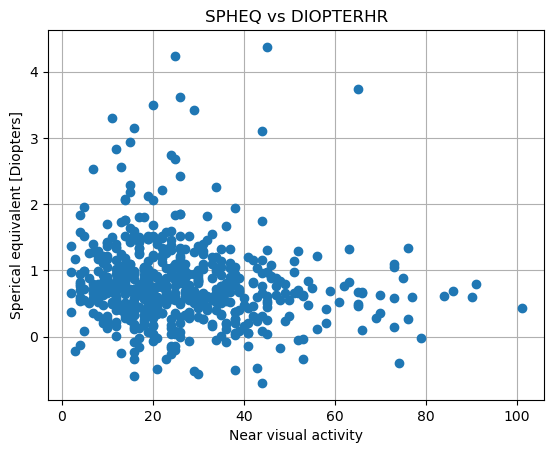

In [43]:
x=myopia['DIOPTERHR']
y=myopia['SPHEQ']

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y, 'o', label='data')
ax.set_xlabel('Near visual activity')
ax.set_ylabel('Sperical equivalent [Diopters]')
plt.title('SPHEQ vs DIOPTERHR')
ax.grid()



In [44]:
# Test about the correlation of SPHEQ (x) and DIOPTERHR(y)
# H0: rho_xy = 0 (no correlation)  H1: rho_xy !=0 (correlation)
res = stats.pearsonr(x, y)

# Level of significance alpha
alpha = 0.05

# Print results
print(f' TS value   chi = {res.statistic:7.3f}')
print(f'        p-value = {res.pvalue:7.3f}')
print(f'sig. lev. alpha = {alpha:7.3f}')


 TS value   chi =  -0.121
        p-value =   0.003
sig. lev. alpha =   0.050


#### Answer 5



According to the Pearson correlation test, **I reject** H0, at α = 0.05, indicating a statistically significant relationship.  
This result suggests that increased time spent on near-work activities is associated with a slightly lower `SPHEQ` value (i.e., greater degree of myopia), although the strength of the correlation is weak.

---



26.01779935275081
